In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tifffile
import os
from PIL import Image
from numpy import asarray
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout, Conv2DTranspose, concatenate, Flatten
from tensorflow.keras import Input
from tensorflow.keras import layers, Model,Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


In [5]:
image = Image.open('../data/ground truth/0060c0a5_agbm.tif')
 
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)

TIFF
(256, 256)
F


In [6]:
from numpy import asarray
 
# asarray() class is used to convert
# PIL images into NumPy arrays
numpydata = asarray(image)
 
# <class 'numpy.ndarray'>
print(type(numpydata))
 
#  shape
print(numpydata.shape)

<class 'numpy.ndarray'>
(256, 256)


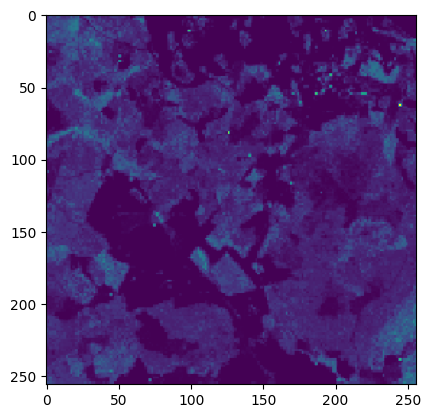

In [7]:
plt.imshow(numpydata)

In [11]:
numpydata = numpydata[np.newaxis,  :, :]

In [12]:
"""
input 1 = s1
input 2 = s2


now it's time to seperate s1 and s2 images!
"""

"\ninput 1 = s1\ninput 2 = s2\n\n\nnow it's time to seperate s1 and s2 images!\n"

In [16]:
def get_X(sat_type='s1'):                                 #gets X from both satellites, depending on value for
    X = []                                                #sat_type variable. Also normalizes the images instantly. 
    basepath1 =  '../data/train data/s1'                  #Have to make one for target/ground truth
    basepath2 =  '../data/train data/s2'
    scaler = MinMaxScaler()
    if sat_type=='s1':
        for file in os.listdir(basepath1):
            path = os.path.join(basepath1, file)
            img = tifffile.imread(path)
            img = tf.image.per_image_standardization(img)
            img = tf.expand_dims(img,axis=0)
            X.append(img)
    elif sat_type=='s2':
        for file in os.listdir(basepath2):
            path = os.path.join(basepath2, file)
            img = tifffile.imread(path)
            img = tf.image.per_image_standardization(img)
            img = tf.expand_dims(img,axis=0)
            X.append(img)
    else:
        print("Are you high or something? This isn't that hard.")
    return np.asarray(X)

In [8]:
def get_trainchip_ids():
    chip_ids = []
    basepath = '../raw_data/Train/Chip_Id'
    for x in os.listdir(basepath):
        chip_ids.append(x)
    return chip_ids

In [162]:
def get_testchips_ids():
    chip_ids = []
    basepath = '../raw_data/Test/Chip_Id'
    for x in os.listdir(basepath):
        chip_ids.append(x)
    return chip_ids

In [9]:
def get_Xs(n_chips=100, chip_ids=get_trainchip_ids()):
    X1 = []
    X2 = []
    basepath = '../raw_data/Train/Chip_Id/'
    for x in range(0,n_chips):
        path = os.path.join(basepath, chip_ids[x])
        path1_1 = os.path.join(path, 'S1')
        path1_2 = os.path.join(path, 'S2')
        files_list = [file for file in os.listdir(path1_1)]
        files_list.sort()
        files_f = files_list[-5:]
        for x in range(0,len(files_f)):
            path2_1 = os.path.join(path1_1, files_f[x])
            img = tifffile.imread(path2_1)
            img = tf.image.per_image_standardization(img)
            img = tf.expand_dims(img,axis=0)
            X1.append(img)
        files_list = [file for file in os.listdir(path1_2)]
        files_list.sort()
        files_f = files_list[-5:]
        for x in range(0,len(files_f)):
            path2_2 = os.path.join(path1_2, files_f[x])
            img = tifffile.imread(path2_2)
            img = tf.image.per_image_standardization(img)
            img = tf.expand_dims(img,axis=0)
            X2.append(img)
    return np.asarray(X1), np.asarray(X2)

In [124]:
def get_Xs(n_chips=100, chip_ids=get_trainchip_ids()):
    X1 = []
    X2 = []
    basepath = '../raw_data/Train/Chip_Id/'
    for x in range(0,n_chips):
        path = os.path.join(basepath, chip_ids[x])
        path1_1 = os.path.join(path, 'S1')
        path1_2 = os.path.join(path, 'S2')
        files_list = [file for file in os.listdir(path1_1)]
        files_list.sort()
        files_f = files_list[-5:]
        for x in range(0,len(files_f)):
            path2_1 = os.path.join(path1_1, files_f[x])
            img = tifffile.imread(path2_1)
            img = tf.image.per_image_standardization(img)
            img = tf.expand_dims(img,axis=0)
            X1.append(img)
        files_list = [file for file in os.listdir(path1_2)]
        files_list.sort()
        files_f = files_list[-5:]
        for x in range(0,len(files_f)):
            path2_2 = os.path.join(path1_2, files_f[x])
            img = tifffile.imread(path2_2)
            img = tf.image.per_image_standardization(img)
            img = tf.expand_dims(img,axis=0)
            X2.append(img)
    return np.asarray(X1), np.asarray(X2)

In [87]:
X_exp = np.concatenate((X1[0], X1[1], X1[2], X1[3], X1[4]), axis=0)

In [88]:
X_exp.shape

(5, 256, 256, 4)

In [4]:
0 setp
1 otc
2 nov
3 dec
4 jan
5 feb
6 mar
7 apr
8 may
9 jun
10 jul
11 aug 


SyntaxError: invalid syntax (1461731475.py, line 1)

In [10]:
def get_y(n_chips=100, chip_ids=get_trainchip_ids()):
    y = []
    basepath = '../raw_data/Train/Chip_Id/'
    for x in range(0,n_chips):
        path = os.path.join(basepath, chip_ids[x])
        path1 = os.path.join(path, 'GroundTruth')
        for file in os.listdir(path1):
            path2 = os.path.join(path1, file)
            img = tifffile.imread(path2)
            img = tf.expand_dims(img,axis=0)
            y.append(img)
    return np.asarray(y)

In [125]:
y = get_y(100)

In [100]:
basepath = '../raw_data/Train/Chip_Id/'
path = os.path.join(basepath, chip_ids[100])
path1_1 = os.path.join(path, 'S1')
path1_2 = os.path.join(path, 'S2')
files_list = [file for file in os.listdir(path1_2)]
files_list.sort()
files_f = files_list[-5:]

In [74]:
len(chip_ids)

8690

In [102]:
files_list

['f4a17e04_S2_06.tif',
 'f4a17e04_S2_07.tif',
 'f4a17e04_S2_08.tif',
 'f4a17e04_S2_09.tif',
 'f4a17e04_S2_10.tif',
 'f4a17e04_S2_11.tif']

In [103]:
files_f

['f4a17e04_S2_07.tif',
 'f4a17e04_S2_08.tif',
 'f4a17e04_S2_09.tif',
 'f4a17e04_S2_10.tif',
 'f4a17e04_S2_11.tif']

In [145]:
len(X1)*0.3

150.0

In [223]:
y.shape

(200, 1, 256, 256)

In [28]:
len(X1)

600

In [27]:
len(X2)

495

In [12]:
chip_ids = get_trainchip_ids()

In [13]:
chip_ids

['2e1ea65c',
 '0058fedc',
 '80201e73',
 '1d7700eb',
 '9512f5f3',
 '82b64c90',
 '9c622a17',
 'e176b9b9',
 '43481cbb',
 '4aa639ec',
 'f60082f5',
 '17058554',
 '28fd5484',
 '2190eda5',
 'c2400457',
 '9870cd44',
 'b25d4119',
 '583086ce',
 'dbba33ea',
 '16b80308',
 'a3af2825',
 'f2db00dd',
 'aae569ac',
 '9388f561',
 '3d8654dc',
 '804f3ba8',
 '56274ceb',
 'f7f98481',
 'a154dbbc',
 '86e8c394',
 'f5487cff',
 '22db73e4',
 'fc450d9d',
 '2c1e31f8',
 '6dc54a52',
 '27194589',
 '109560c3',
 '566d4c1e',
 'd3a2645b',
 'dc65c754',
 '74d2eb17',
 'c63a71e3',
 '150b249d',
 'd02be9ae',
 'da126f40',
 'ff374b38',
 '4d27a2c8',
 'a36766f9',
 'a033f1d5',
 '4ec658dc',
 '3eeffa8a',
 'e6f21c39',
 '934b03ee',
 '7123e5f5',
 'faa49565',
 'ab8f4064',
 '4ba93143',
 '628aa4ac',
 '56d2d95b',
 'ec555861',
 '603fdcac',
 '893c3cd5',
 '982caba9',
 '1c86e26b',
 '9aa97a9f',
 '85491a3a',
 '712afd7b',
 'd41bde89',
 'a92f468a',
 '520eeb54',
 '9255cdfb',
 'c96ceb57',
 'ec31a809',
 'a53c9f32',
 '0de54a5e',
 '52f2b7a1',
 'd553bb5a',

In [126]:
X1, X2 = get_Xs(100)

In [127]:
X1.shape

(500, 1, 256, 256, 4)

In [128]:
X2.shape

(500, 1, 256, 256, 11)

In [104]:
len(X1)*0.3

30.0

In [143]:
X1_train = X1[0:350]

In [144]:
X1_train.shape

(350, 1, 256, 256, 4)

In [146]:
X1_test = X1[-150:]

In [139]:
X1_test.shape

(30, 1, 256, 256, 4)

In [156]:
250*0.3

75.0

In [147]:
X2_train = X2[0:350]

In [148]:
X2_test = X2[-150:]

In [149]:
y_train = y[0:70]

In [150]:
y_test= y[-30:]

In [151]:
len(y_train)

70

In [152]:
def init_model(start_n):
    
    input1 = Input(shape=(256,256,4))
    input2 = Input(shape=(256,256,11))

    conv1 = Conv2D(start_n * 1, (4, 4), activation="relu", padding="same")(input1)
    conv1_1 = Conv2D(start_n * 1, (4, 4), activation="relu", padding="same")(input2)
    conv1 = concatenate([conv1, conv1_1])
    conv1 = Conv2D(start_n * 1, (4, 4), activation="relu", padding="same")(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)
    pool1 = Dropout(0.25)(pool1)

    conv2 = Conv2D(start_n * 2, (4, 4), activation="relu", padding="same")(pool1)
    conv2 = Conv2D(start_n * 2, (4, 4), activation="relu", padding="same")(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)
    pool2 = Dropout(0.5)(pool2)

    conv3 = Conv2D(start_n * 4, (3, 3), activation="relu", padding="same")(pool2)
    conv3 = Conv2D(start_n * 4, (3, 3), activation="relu", padding="same")(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)
    pool3 = Dropout(0.5)(pool3)

    conv4 = Conv2D(start_n * 8, (3, 3), activation="relu", padding="same")(pool3)
    conv4 = Conv2D(start_n * 8, (3, 3), activation="relu", padding="same")(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)
    pool4 = Dropout(0.5)(pool4)

    
    convm = Conv2D(start_n * 16, (3, 3), activation="relu", padding="same")(pool4)
    convm = Conv2D(start_n * 16, (3, 3), activation="relu", padding="same")(convm)
    
    deconv4 = Conv2DTranspose(start_n * 8, (3, 3), strides=(2, 2), padding="same")(convm)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = Dropout(0.5)(uconv4)
    uconv4 = Conv2D(start_n * 8, (3, 3), activation="relu", padding="same")(uconv4)
    uconv4 = Conv2D(start_n * 8, (3, 3), activation="relu", padding="same")(uconv4)

    deconv3 = Conv2DTranspose(start_n * 4, (3, 3), strides=(2, 2), padding="same")(uconv4)
    uconv3 = concatenate([deconv3, conv3])
    uconv3 = Dropout(0.5)(uconv3)
    uconv3 = Conv2D(start_n * 4, (3, 3), activation="relu", padding="same")(uconv3)
    uconv3 = Conv2D(start_n * 4, (3, 3), activation="relu", padding="same")(uconv3)

    deconv2 = Conv2DTranspose(start_n * 2, (3, 3), strides=(2, 2), padding="same")(uconv3)
    uconv2 = concatenate([deconv2, conv2])
    uconv2 = Dropout(0.5)(uconv2)
    uconv2 = Conv2D(start_n * 2, (3, 3), activation="relu", padding="same")(uconv2)
    uconv2 = Conv2D(start_n * 2, (3, 3), activation="relu", padding="same")(uconv2)

    deconv1 = Conv2DTranspose(start_n * 1, (3, 3), strides=(2, 2), padding="same")(uconv2)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = Dropout(0.5)(uconv1)
    uconv1 = Conv2D(start_n * 1, (3, 3), activation="relu", padding="same")(uconv1)
    uconv1 = Conv2D(start_n * 1, (3, 3), activation="relu", padding="same")(uconv1)
    
    output_layer = Conv2D(1, (1,1), padding="same", activation="linear")(uconv1)

    model = Model(inputs=[input1, input2], outputs = [output_layer])
    
    model.compile(loss='mse',
                  optimizer='rmsprop',
                  metrics=['mse'])

    return model

In [153]:
def fit_model(model,X1, X2, y):
    es = EarlyStopping(restore_best_weights = True)
    i = 0
    while i <= len(y)-1: 
        for x in range(0, len(X1)-1):
            history = model.fit([X1[x],X2[x]], y[i], verbose = 1, epochs = 1, callbacks = [es])
            if (x+1)%5==0:
                i+=1
        if i == len(y)-1:
            print("The model is done Training!")
            break
    return model, history

In [154]:
j = 0
for i in range(20):
    if (i+1)% 5 == 0:
        j += 1
    print (i, j)

0 0
1 0
2 0
3 0
4 1
5 1
6 1
7 1
8 1
9 2
10 2
11 2
12 2
13 2
14 3
15 3
16 3
17 3
18 3
19 4


In [155]:
model = init_model(32)

In [156]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 256, 256, 4  0           []                               
                                )]                                                                
                                                                                                  
 input_14 (InputLayer)          [(None, 256, 256, 1  0           []                               
                                1)]                                                               
                                                                                                  
 conv2d_103 (Conv2D)            (None, 256, 256, 32  2080        ['input_13[0][0]']               
                                )                                                           

                                                                                                  
 conv2d_transpose_22 (Conv2DTra  (None, 128, 128, 64  73792      ['conv2d_117[0][0]']             
 nspose)                        )                                                                 
                                                                                                  
 concatenate_29 (Concatenate)   (None, 128, 128, 12  0           ['conv2d_transpose_22[0][0]',    
                                8)                                'conv2d_107[0][0]']             
                                                                                                  
 dropout_46 (Dropout)           (None, 128, 128, 12  0           ['concatenate_29[0][0]']         
                                8)                                                                
                                                                                                  
 conv2d_11

In [157]:
model, history = fit_model(model, X1_train,X2_train, y_train)

2022-12-05 17:00:40.484969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 89ms/step - loss: 7714.5610 - mse: 7714.5610


1/1 [==============================] - 0s 91ms/step - loss: 858.2549 - mse: 858.2549


1/1 [==============================] - 0s 89ms/step - loss: 20891.3809 - mse: 20891.3809


1/1 [==============================] - 0s 88ms/step - loss: 14315.0430 - mse: 14315.0430


KeyboardInterrupt: 

In [261]:
X1_test.shape

(300, 1, 256, 256, 4)

In [80]:
model.evaluate([X1_test[-2],X2_test[-2]],y_test[-1])

1/1 [==============================] - 0s 64ms/step - loss: 5963.8535 - mse: 5963.8535


[5963.853515625, 5963.853515625]

In [81]:
prediction = model.predict([X1_test[-2],X2_test[-2]])

1/1 [==============================] - 0s 26ms/step


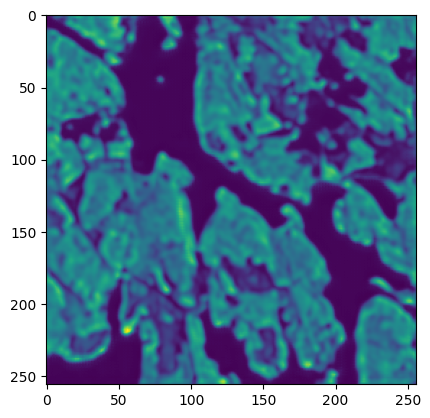

In [82]:
predict_ = tf.squeeze(prediction)
plt.imshow(predict_)

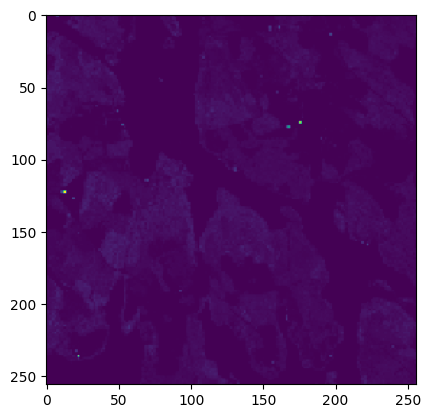

In [83]:
y_true = tf.squeeze(y_test[-1])
plt.imshow(y_true)

In [29]:
#On a larger dataset, this should go pretty well! Our mse is decreasing everytime, all we need is enough images!

In [161]:
def get_predictions(model, n_chips, chip_ids=get_testchips_ids()):
    X1 = []
    X2 = []
    basepath = '../raw_data/Test/Chip_Id/'
    for x in range(0,n_chips):
        path = os.path.join(basepath, chip_ids[x])
        path1_1 = os.path.join(path, 'S1')
        path1_2 = os.path.join(path, 'S2')
        files_list1 = [file for file in os.listdir(path1_1)]
        files_list1.sort()
        files_f1 = files_list1[-2]
        path2_1 = os.path.join(path1_1, files_f1[0])
        img1 = tifffile.imread(path2_1)
        img1 = tf.image.per_image_standardization(img1)
        img1 = tf.expand_dims(img1,axis=0)
        X1.append(img1)
        files_list2 = [file for file in os.listdir(path1_2)]
        files_list2.sort()
        files_f2 = files_list2[-2]
        path2_2 = os.path.join(path1_2, files_f2[0])
        img2 = tifffile.imread(path2_2)
        img2 = tf.image.per_image_standardization(img2)
        img2 = tf.expand_dims(img2,axis=0)
        X2.append(img2)
        X1 = np.asarray(X1)
        X2 = np.asarray(X2)
    for x in range(0,(len(X1)-1)):
        prediction = model.predict([X1[x], X2[x]])
        predict_ = tf.squeeze(prediction)
        tifffile.imwrite(f'{chip_id})_agbm.tif', predict_)
    print('Done getting predictions!')